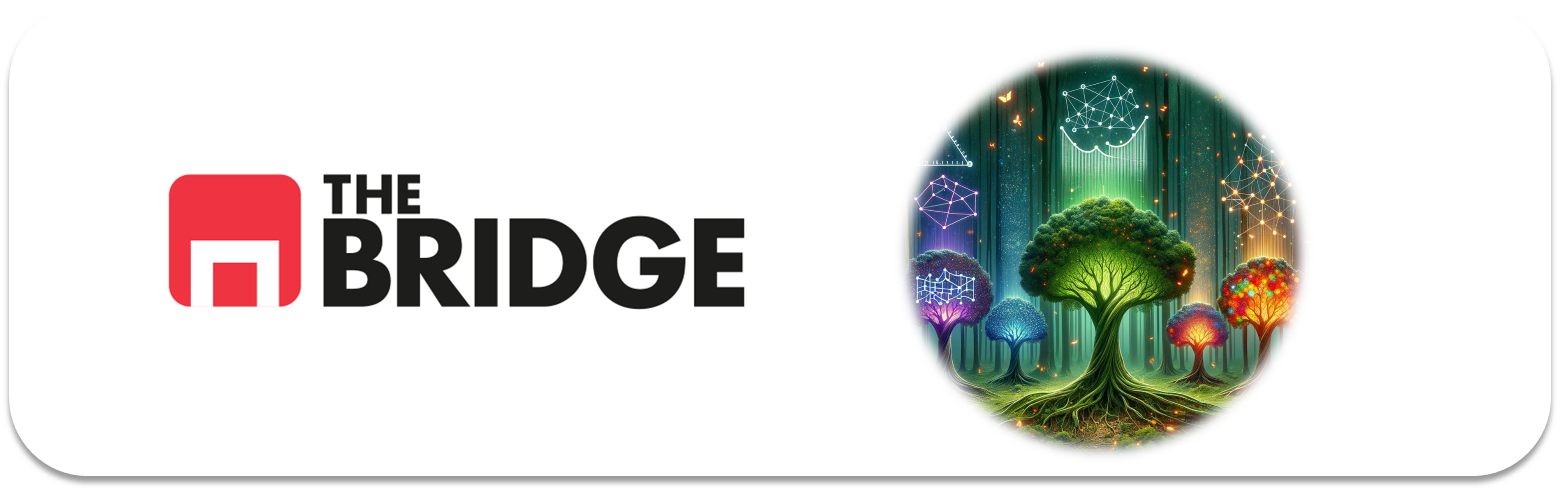

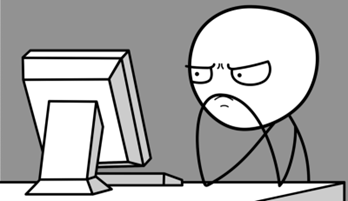

Para ejercitarte y afianzar lo aprendido sobre **Regresion con Árboles de decisión**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

Este conjunto de ejercicios trabajan sobre un dataset de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average



### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor


### Ejercicio 1

Importa el csv "temps.csv"

In [6]:
df_temps= pd.read_csv("./data/temps.csv")
df_temps["day"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

In [5]:
categoricas=["month","week","day"]

### Ejercicio 2

Haz un one-hot encoding de las variables categóricas del dataset

In [7]:
df_temps= pd.get_dummies(df_temps,columns=categoricas,dtype=int)
df_temps

,year,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,month_1,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,2016,45,45,45.6,45,43,50,44,29,1,...,0,0,0,0,0,0,0,0,0,0
1,2016,44,45,45.7,44,41,50,44,61,1,...,0,0,0,0,0,0,0,0,0,0
2,2016,45,44,45.8,41,43,46,47,56,1,...,0,0,0,0,0,0,0,0,0,0
3,2016,44,41,45.9,40,44,48,46,53,1,...,0,0,0,0,0,0,0,0,0,0
4,2016,41,40,46.0,44,46,46,46,41,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,42,42,45.2,47,41,50,47,47,0,...,0,0,0,0,0,1,0,0,0,0
344,2016,42,47,45.3,48,41,49,44,58,0,...,0,0,0,0,0,0,1,0,0,0
345,2016,47,48,45.3,48,43,50,45,65,0,...,0,0,0,0,0,0,0,1,0,0
346,2016,48,48,45.4,57,44,46,44,42,0,...,0,0,0,0,0,0,0,0,1,0


In [8]:
df_temps["year"].value_counts()

year
2016    348
Name: count, dtype: int64

In [9]:
df_temps= df_temps.drop(columns="year")
df_temps

,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,month_1,month_2,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,45,45,45.6,45,43,50,44,29,1,0,...,0,0,0,0,0,0,0,0,0,0
1,44,45,45.7,44,41,50,44,61,1,0,...,0,0,0,0,0,0,0,0,0,0
2,45,44,45.8,41,43,46,47,56,1,0,...,0,0,0,0,0,0,0,0,0,0
3,44,41,45.9,40,44,48,46,53,1,0,...,0,0,0,0,0,0,0,0,0,0
4,41,40,46.0,44,46,46,46,41,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,42,42,45.2,47,41,50,47,47,0,0,...,0,0,0,0,0,1,0,0,0,0
344,42,47,45.3,48,41,49,44,58,0,0,...,0,0,0,0,0,0,1,0,0,0
345,47,48,45.3,48,43,50,45,65,0,0,...,0,0,0,0,0,0,0,1,0,0
346,48,48,45.4,57,44,46,44,42,0,0,...,0,0,0,0,0,0,0,0,1,0


### Ejercicio 3

Divide en train y test

In [10]:
target= "actual"
X= df_temps.drop(columns=target)
y= df_temps[target]

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Ejercicio 4

Instancia un DecisionTreeRegressor de sklearn con hiperparámetros por defecto y entrénalo.

In [12]:
tree_reg= DecisionTreeRegressor()
tree_reg.fit(X_train,y_train)

DecisionTreeRegressor()

### Ejercicio 5

Calcula su MAE sin usar sklearn.

In [13]:
prediccion_tree_reg=tree_reg.predict(X_test)

In [14]:
mae_tree_reg = np.mean(np.abs(y_test - prediccion_tree_reg))
mae_tree_reg

4.557142857142857

### Ejercicio 6

Calcula su MAPE sin usar sklearn

In [15]:
mape_tree_reg = np.mean(np.abs((y_test - prediccion_tree_reg) / y_test)) * 100
mape_tree_reg

7.259701299258412

### Ejercicio 7

Representa el árbol de decision

[Text(0.4824930414979757, 0.9736842105263158, 'x[1] <= 59.5\nsquared_error = 138.218\nsamples = 278\nvalue = 62.342'),
 Text(0.22980109135715543, 0.9210526315789473, 'x[2] <= 46.85\nsquared_error = 43.932\nsamples = 116\nvalue = 51.414'),
 Text(0.35614706642756555, 0.9473684210526316, 'True  '),
 Text(0.09012497799683154, 0.868421052631579, 'x[1] <= 44.5\nsquared_error = 19.984\nsamples = 32\nvalue = 43.375'),
 Text(0.04506248899841577, 0.8157894736842105, 'x[3] <= 42.5\nsquared_error = 10.055\nsamples = 17\nvalue = 41.059'),
 Text(0.022531244499207886, 0.7631578947368421, 'x[6] <= 46.5\nsquared_error = 6.56\nsamples = 5\nvalue = 43.8'),
 Text(0.011265622249603943, 0.7105263157894737, 'x[0] <= 38.0\nsquared_error = 2.667\nsamples = 3\nvalue = 42.0'),
 Text(0.005632811124801971, 0.6578947368421053, 'squared_error = 0.0\nsamples = 1\nvalue = 44.0'),
 Text(0.016898433374405913, 0.6578947368421053, 'x[6] <= 38.5\nsquared_error = 1.0\nsamples = 2\nvalue = 41.0'),
 Text(0.011265622249603943,

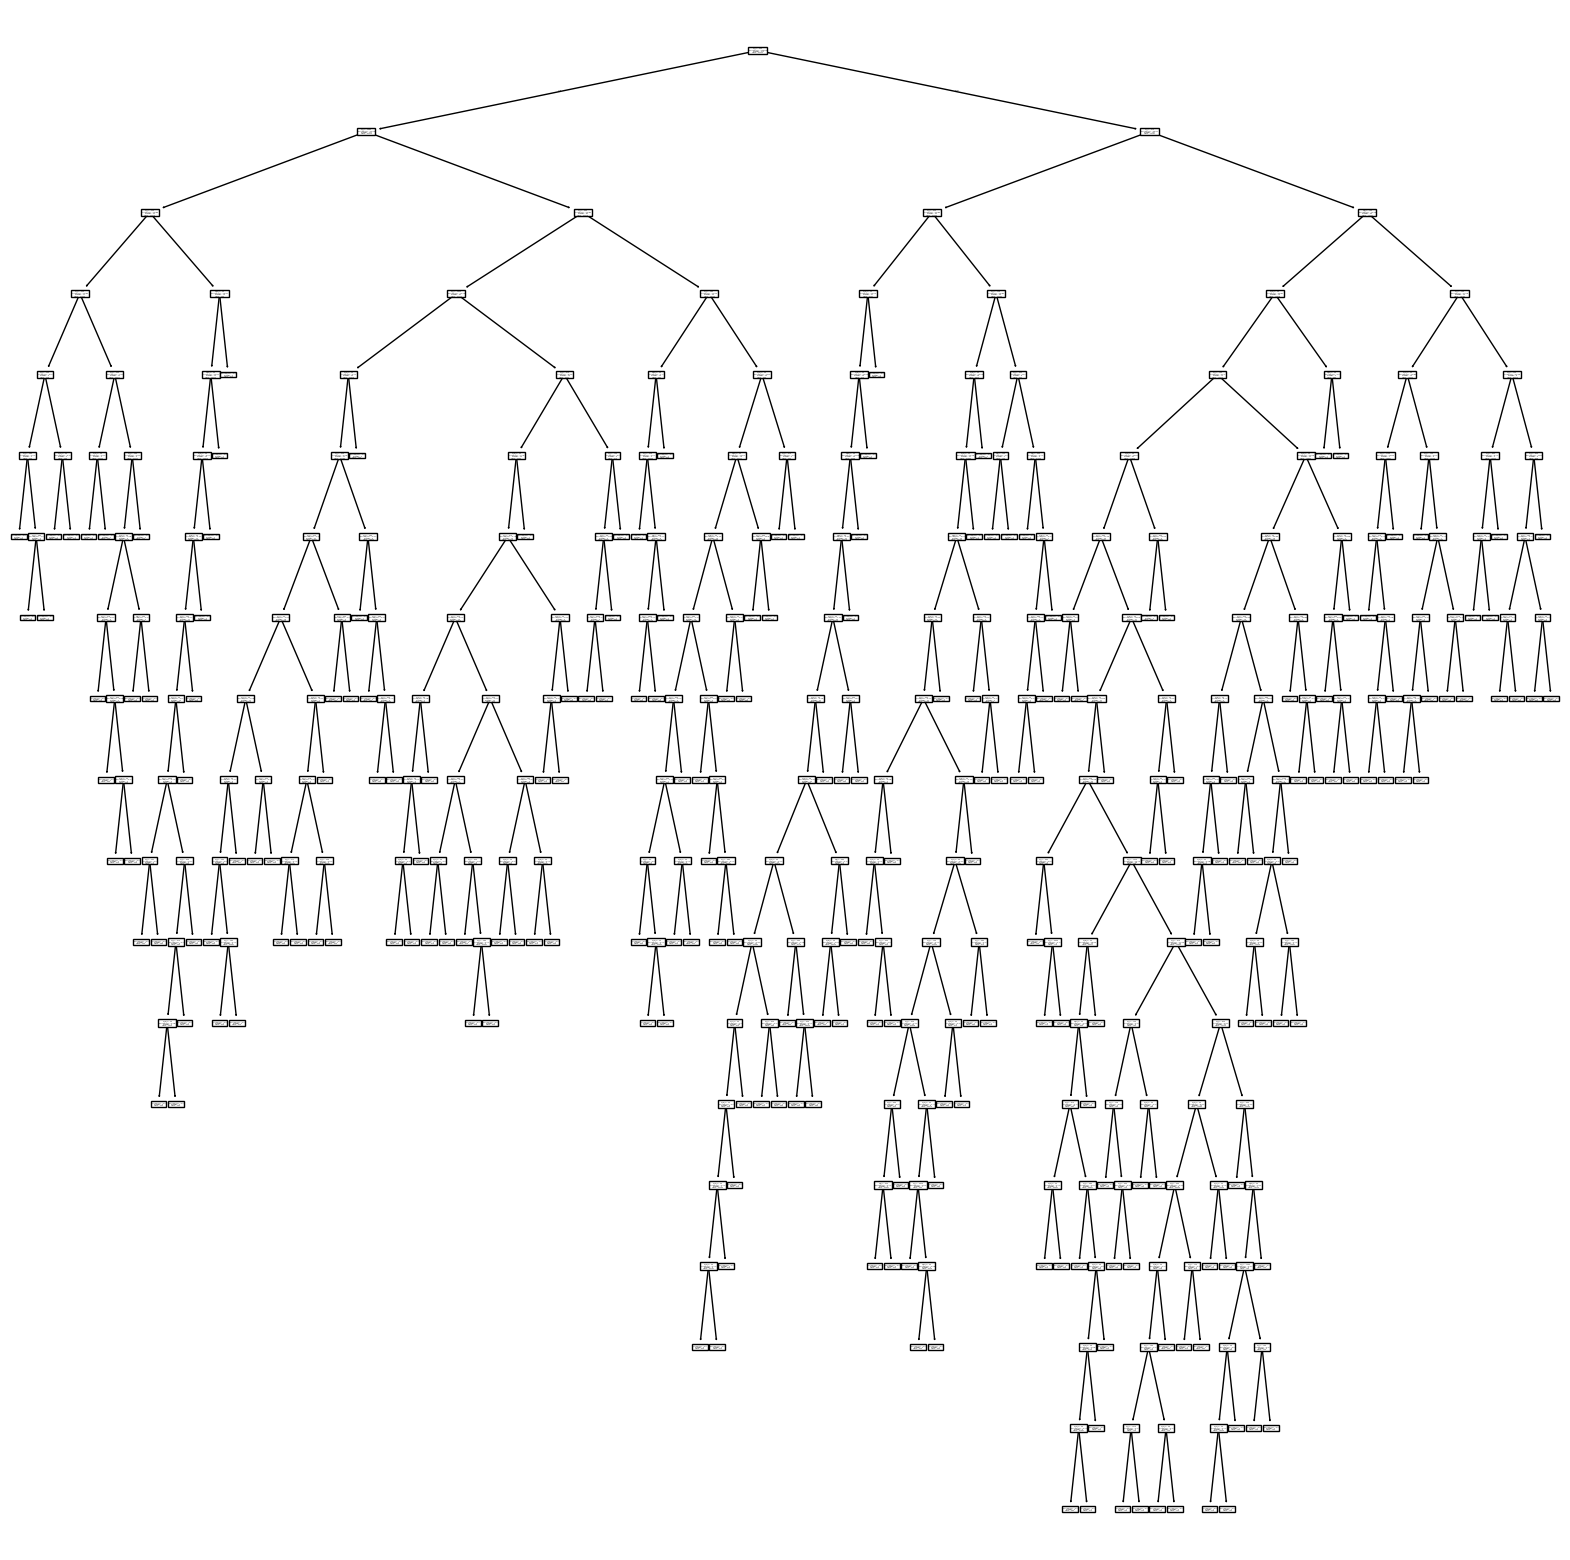

In [17]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
plot_tree(tree_reg)

### Ejercicio 8. 

Instancia un nuevo árbol ahora con max_depth a 3 y vuelve a entrenarlo

In [18]:
tree_depth3= DecisionTreeRegressor(max_depth=3)
tree_depth3.fit(X_train,y_train)
prediccion_tree_depth3= tree_depth3.predict(X_test)

### Ejercicio 9

Vuelve a calcular MAE y MAPE

In [19]:
#MAE
mae_tree_depth3 = np.mean(np.abs(y_test - prediccion_tree_depth3))
mae_tree_depth3

4.5567196265742504

In [20]:
#MAPE
mape_tree_depth3 = np.mean(np.abs((y_test - prediccion_tree_depth3) / y_test)) * 100
mape_tree_depth3

7.147155657048517

### Ejercicio 10

Vuelve a representar su árbol

[Text(0.5, 0.875, 'x[1] <= 59.5\nsquared_error = 138.218\nsamples = 278\nvalue = 62.342'),
 Text(0.25, 0.625, 'x[2] <= 46.85\nsquared_error = 43.932\nsamples = 116\nvalue = 51.414'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[1] <= 44.5\nsquared_error = 19.984\nsamples = 32\nvalue = 43.375'),
 Text(0.0625, 0.125, 'squared_error = 10.055\nsamples = 17\nvalue = 41.059'),
 Text(0.1875, 0.125, 'squared_error = 18.267\nsamples = 15\nvalue = 46.0'),
 Text(0.375, 0.375, 'x[1] <= 55.5\nsquared_error = 19.059\nsamples = 84\nvalue = 54.476'),
 Text(0.3125, 0.125, 'squared_error = 10.728\nsamples = 54\nvalue = 52.444'),
 Text(0.4375, 0.125, 'squared_error = 13.249\nsamples = 30\nvalue = 58.133'),
 Text(0.75, 0.625, 'x[1] <= 67.5\nsquared_error = 58.991\nsamples = 162\nvalue = 70.167'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[4] <= 64.5\nsquared_error = 22.059\nsamples = 63\nvalue = 64.063'),
 Text(0.5625, 0.125, 'squared_error = 16.974\nsamples = 27\nvalue = 61.37'),
 Text

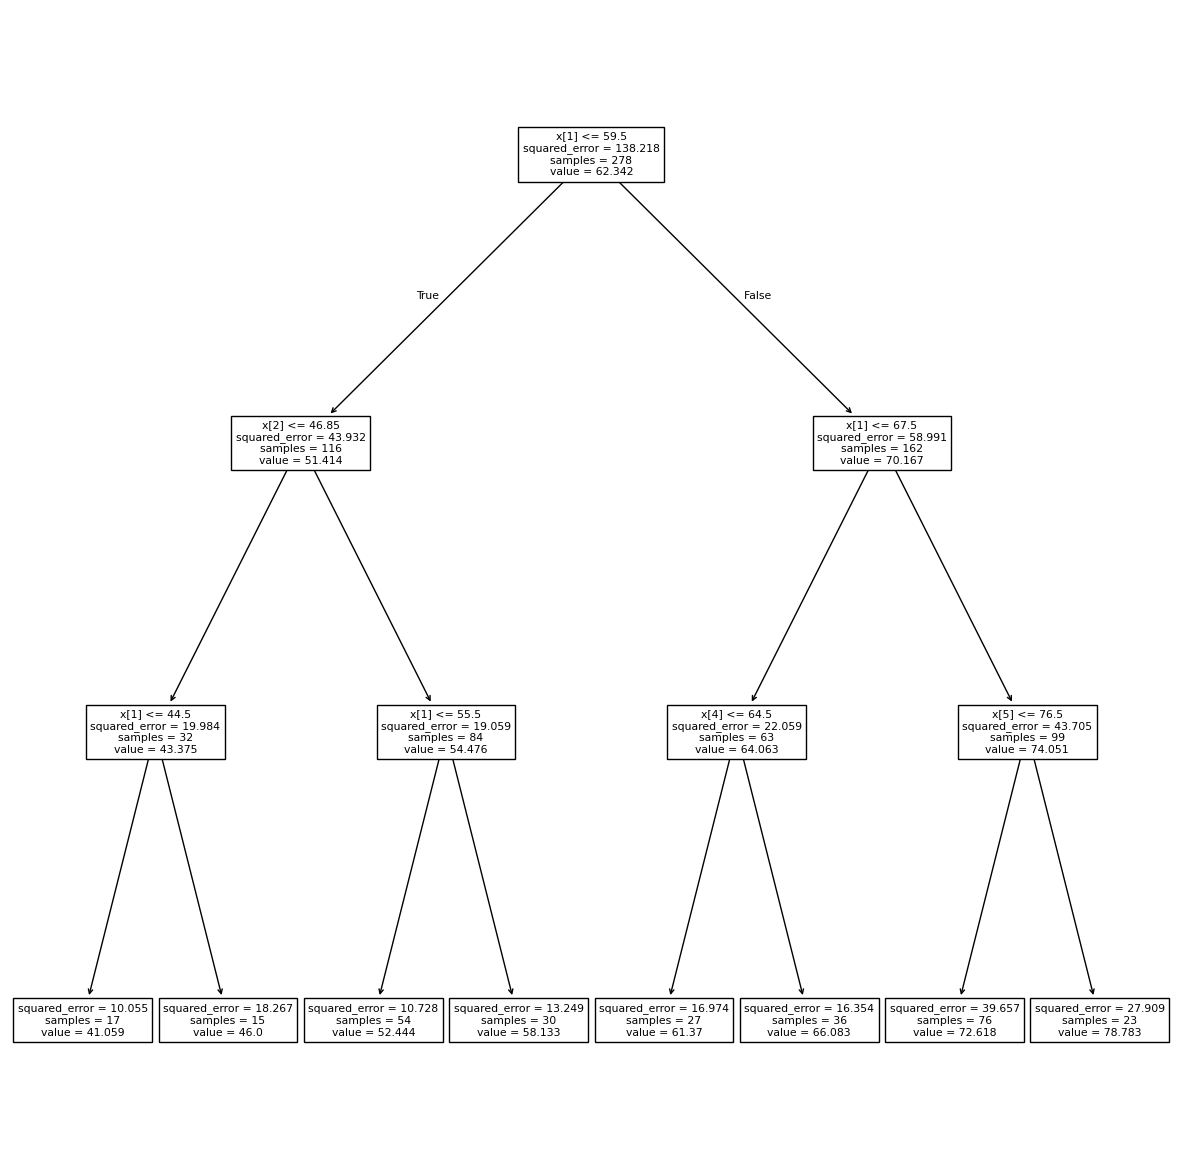

In [22]:
plt.figure(figsize=(15,15))
plot_tree(tree_depth3)

### Ejercicio 11

Obten el `feature_importances` de cada variable en el último modelo. Los árboles una vez entrenados tienen un atributo que te lo permite, revisa la documentación si es necesario.

In [26]:
print(tree_depth3.feature_importances_)

[0.         0.88020751 0.08841159 0.         0.01060993 0.02077097
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]
